<a href="https://colab.research.google.com/github/jairo-nlp/valuation/blob/master/Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date


start = date(2019, 1, 1)
end = date(2020, 7, 30)

tickers = {
    'bancos': ['ITSA4.SA', 'BBDC4.SA', 'BBAS3.SA', 'SANB4.SA'],
    'industrial': ['WEGE3.SA', 'TUPY3.SA', 'MYPK3.SA', 'SHUL4.SA'],
    'varejo': ['VVAR3.SA', 'BTOW3.SA', 'MGLU3.SA'],
    'imobiliário': ['TRIS3.SA', 'ALSO3.SA', 'MRVE3.SA', 'EZTC3.SA', 'TCSA3.SA'],
    'saúde': ['AALR3.SA', 'FLRY3.SA', 'QUAL3.SA']
    }

data_source = 'yahoo'

In [171]:
def obtem_dados_setor(setor):
  """Retorna df com dados das ações do setor informado
  """

  stock_data = DataReader(tickers[setor], data_source, start, end)
  return stock_data

In [203]:
def normalizado(df):
  """Normaliza dados gerando o efeito de começarem todos em 1.

  Para integrar ao dataframe original, use o append.

  Ex: df.append(normalizado(df))

  :param df: dataframe de entrada com n ativos em multiindex
  :return df_norm: dataframe de saída, com a coluna normalizada mantendo o índice dos ativos, porém utilizando 'Norm Close' para o nível mais acima.
  """
  tickers = df.columns.levels[1]
  names = df.columns.names
  idx = df.index
  cols = pd.MultiIndex.from_product([['Norm Close'], tickers], names=names)

  return pd.DataFrame((df['Adj Close'] / (df['Adj Close'].iloc[0])).values, columns=cols, index=idx)

In [247]:
def obtem_tickers_legenda(legend_labels):
  filtro_rotulos = r'\,\s(.*)\.'
  rotulos_amigaveis = [re.findall(filtro_rotulos, el)[0] 
                       for el in legend_labels]
  return rotulos_amigaveis

In [254]:
def plot_linhas(df, setor=''):
  fig, ax = plt.subplots(figsize=(12, 6))
  df.plot(ax=ax)
  plt.xlabel('Tempo')
  plt.ylabel('Cotação')

  # Para incluir no título do gráfico
  data_ini = df.index[0].strftime('%m/%Y')
  data_fim = df.index[-1].strftime('%m/%Y')

  legend_labels = ax.get_legend_handles_labels()[1]
  ax.legend(obtem_tickers_legenda(legend_labels))

  plt.title(f'Cotação Relativa - {setor.upper()} - ({data_ini} - {data_fim})')
  plt.show()

In [249]:
a = ['(Norm Close, ITSA4.SA)', '(Norm Close, BBDC4.SA)', '(Norm Close, BBAS3.SA)', '(Norm Close, SANB4.SA)']
[re.findall(r'\,\s(.*)\.', el)[0] for el in a]

['ITSA4', 'BBDC4', 'BBAS3', 'SANB4']

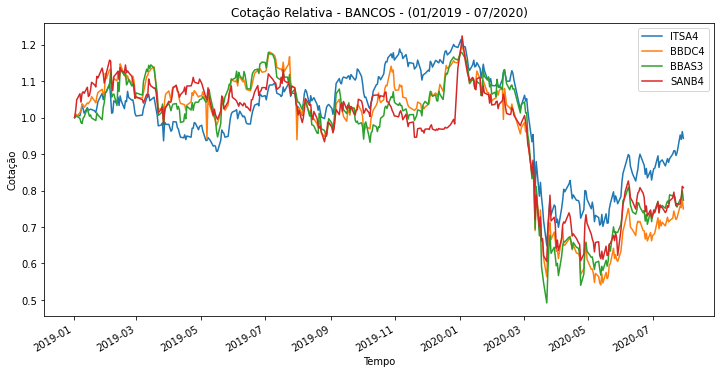

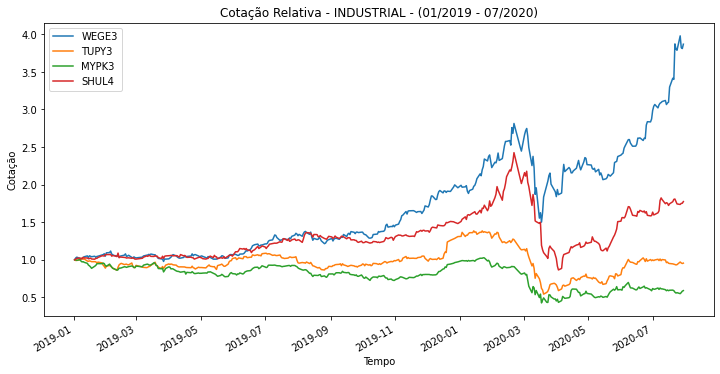

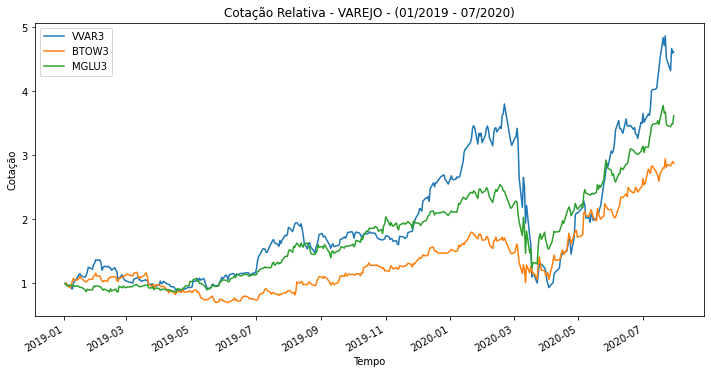

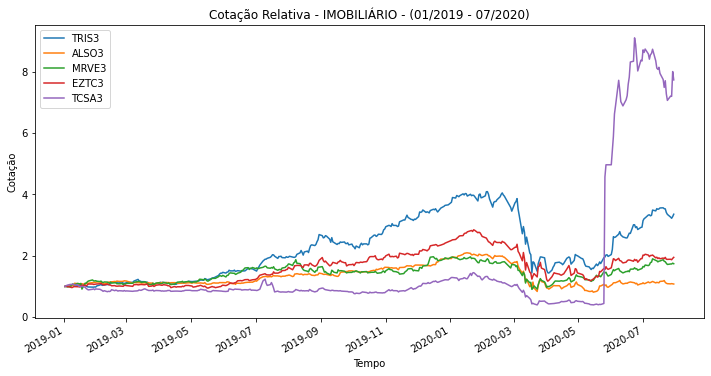

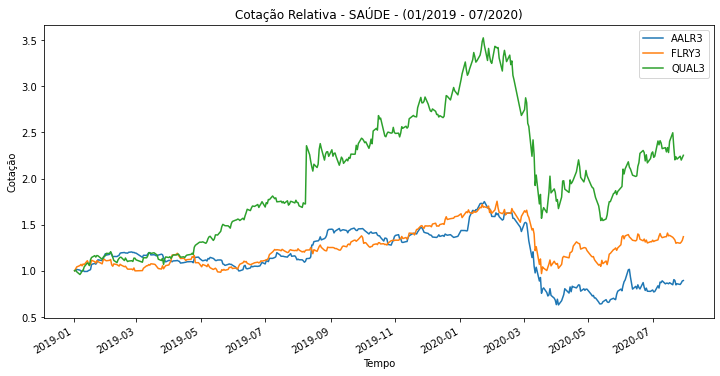

In [255]:
setores = ['bancos', 'industrial', 'varejo', 'imobiliário', 'saúde']
dados = {}

for setor in setores:
  dados[setor] = obtem_dados_setor(setor=setor)
  dados_normalizados = normalizado(dados[setor])
  dados[setor] = pd.concat([dados[setor], dados_normalizados], axis=1)
  dados[setor]['setor'] = setor
  plot_linhas(dados_normalizados, setor=setor)

In [251]:
dados['bancos']

Attributes  Adj Close                        ... Norm Close             setor
Symbols      ITSA4.SA   BBDC4.SA   BBAS3.SA  ...   BBAS3.SA  SANB4.SA        
Date                                         ...                             
2019-01-02  11.574031  31.232300  44.986126  ...   1.000000  1.000000  bancos
2019-01-03  11.674674  31.547350  45.171249  ...   1.004115  1.019779  bancos
2019-01-04  11.638078  31.299864  45.171249  ...   1.004115  1.048758  bancos
2019-01-07  11.628927  31.671186  44.875050  ...   0.997531  1.065317  bancos
2019-01-08  11.784468  31.864559  44.365944  ...   0.986214  1.042273  bancos
...               ...        ...        ...  ...        ...       ...     ...
2020-07-24  10.450000  22.639999  33.950001  ...   0.754677  0.764056  bancos
2020-07-27  11.020000  23.680000  34.910000  ...   0.776017  0.762527  bancos
2020-07-28  10.880000  23.520000  35.029999  ...   0.778684  0.780367  bancos
2020-07-29  11.130000  24.260000  35.950001  ...   0.799135  0.811459  bancos
2020-07-30  10.910000  23.410000  34.799999  ...   0.773572  0.807891  bancos

[391 rows x 29 columns]